In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import mean_squared_error

from src.functions import Functions

In [2]:
def func_dados(valor) -> float:
    valor_final = 5 + valor*2
    return valor_final

In [3]:
n = 200
b = np.random.randint(1, 20, n)
b[:10]

array([ 3, 18, 15, 14,  4,  9, 15, 10, 13, 13], dtype=int32)

In [4]:
a = np.apply_along_axis(func_dados, 0, b)
a[:10]

array([11, 41, 35, 33, 13, 23, 35, 25, 31, 31], dtype=int32)

In [5]:
df = pd.DataFrame(
    data={
        'x': a,
        'y': b
    }
).round(0)
df.head()

,x,y
0,11,3
1,41,18
2,35,15
3,33,14
4,13,4


In [6]:
def func_dados_erro(valor: int) -> float:
    erro = np.random.normal(0, 2, 1)
    valor_final = valor + erro[0]
    return valor_final

In [7]:
df['x_noise'] = df['x'].apply(func=func_dados_erro)
df['y_noise'] = df['y'].apply(func=func_dados_erro)
df.head()

,x,y,x_noise,y_noise
0,11,3,9.221582,5.484345
1,41,18,38.789694,19.178453
2,35,15,37.888514,18.395888
3,33,14,28.559068,15.181086
4,13,4,12.441238,3.594260


In [8]:
def novo_valor(valor: int, correct: float, q1y: float, q3y: float) -> float:
    if valor <= q1y:
        return valor + correct
    if valor >= q3y:
        return valor + correct
    return valor

In [9]:
q1y = df.y_noise.quantile(.25)
q3y = df.y_noise.quantile(.75)

df['y_noise_new'] = df['y_noise'].apply(func=novo_valor, args=(5, q1y, q3y))
df.head()

,x,y,x_noise,y_noise,y_noise_new
0,11,3,9.221582,5.484345,10.484345
1,41,18,38.789694,19.178453,24.178453
2,35,15,37.888514,18.395888,23.395888
3,33,14,28.559068,15.181086,15.181086
4,13,4,12.441238,3.594260,8.594260


In [10]:
minx = df.x_noise.min()
q1x = df.x_noise.quantile(.25)
q3x = df.x_noise.quantile(.75)
maxx = df.x_noise.max()

miny = df.y_noise_new.min()
q1y = df.y_noise_new.quantile(.25)
q3y = df.y_noise_new.quantile(.75)
maxy = df.y_noise_new.max()

noise = pd.DataFrame({
    'x':[minx, q1x, q3x, maxx],
    'y':[miny, q1y, q3y, maxy],
})
noise

,x,y
0,2.658111,3.111777
1,16.408071,8.705770
2,36.257854,16.456857
3,47.671139,26.994518


In [11]:
lista_valores = list()

[lista_valores.append(x) for x in np.random.randint(minx, q1x, 50)]
[lista_valores.append(x) for x in np.random.randint(q1x, q3x, 100)]
[lista_valores.append(x) for x in np.random.randint(q3x, maxx, 50)]

df["x_noise_mean"] = np.array(lista_valores)

lista_valores = list()

[lista_valores.append(y) for y in np.random.randint(miny, q1y, 50)]
[lista_valores.append(y) for y in np.random.randint(q1y, q3y, 100)]
[lista_valores.append(y) for y in np.random.randint(q3y, maxy, 50)]

df["y_noise_mean"] = np.array(lista_valores)

df.head()

,x,y,x_noise,y_noise,y_noise_new,x_noise_mean,y_noise_mean
0,11,3,9.221582,5.484345,10.484345,11,4
1,41,18,38.789694,19.178453,24.178453,6,7
2,35,15,37.888514,18.395888,23.395888,3,7
3,33,14,28.559068,15.181086,15.181086,11,5
4,13,4,12.441238,3.594260,8.594260,8,5


In [12]:
df_1 = df.sample(frac=.5)
df_2 = df.sample(frac=.5)

In [13]:
df_1['class'] = True
df_1.loc[df_1['x_noise'].sample(frac=.75).index, 'class'] = False
df_1['class'].value_counts()

class
False    75
True     25
Name: count, dtype: int64

In [14]:
df_1['style'] = "o"
df_1.loc[df_1[df_1['class']].index, 'style'] = '+'
df_1.head()

,x,y,x_noise,y_noise,y_noise_new,x_noise_mean,y_noise_mean,class,style
71,25,10,24.550125,11.491226,11.491226,32,12,False,o
62,15,5,13.546103,5.892641,10.892641,32,8,False,o
131,7,1,7.600460,0.819574,5.819574,34,10,True,+
139,41,18,42.614957,21.143344,26.143344,29,15,False,o
105,11,3,7.807820,-0.237737,4.762263,32,10,False,o


In [15]:
df_1['style'].value_counts()

style
o    75
+    25
Name: count, dtype: int64

In [16]:
df_1['style_2'] = "o"
df_1.loc[df_1[df_1['y_noise_new'] > 17].index, 'style_2'] = '+'
df_1.head()

,x,y,x_noise,y_noise,y_noise_new,x_noise_mean,y_noise_mean,class,style,style_2
71,25,10,24.550125,11.491226,11.491226,32,12,False,o,o
62,15,5,13.546103,5.892641,10.892641,32,8,False,o,o
131,7,1,7.600460,0.819574,5.819574,34,10,True,+,o
139,41,18,42.614957,21.143344,26.143344,29,15,False,o,+
105,11,3,7.807820,-0.237737,4.762263,32,10,False,o,o


In [17]:
# dump(df_1, 'df_1')
# dump(df_2, 'df_2')
# dump(df, 'df')

In [18]:
df = load('./data/df')
df_1 = load('./data/df_1')
df_2 = load('./data/df_2')

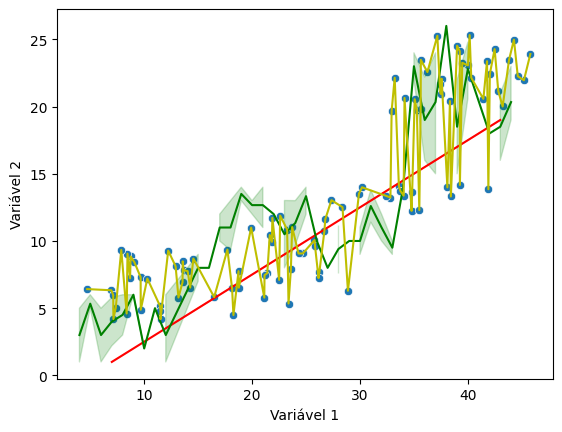

In [19]:
obsr = "Variável 1"
pred = "Variável 2"
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    data=df_1
)
sns.lineplot(
    x='x',
    y='y',
    data=df_1,
    c='r',
)
sns.lineplot(
    x='x_noise_mean',
    y='y_noise_mean',
    data=df_1,
    c='g',
)
sns.lineplot(
    x='x_noise',
    y='y_noise_new',
    data=df_1,
    c='y',
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.show()

In [20]:
print(f"RMSE red: {mean_squared_error(df['x'], df['y'])}")
print(f"RMSE gree: {mean_squared_error(df['x_noise_mean'], df['y_noise_mean'])}")
print(f"RMSE yellow: {mean_squared_error(df['x_noise'], df['x_noise'])}")

RMSE red: 251.58
RMSE gree: 212.315
RMSE yellow: 0.0


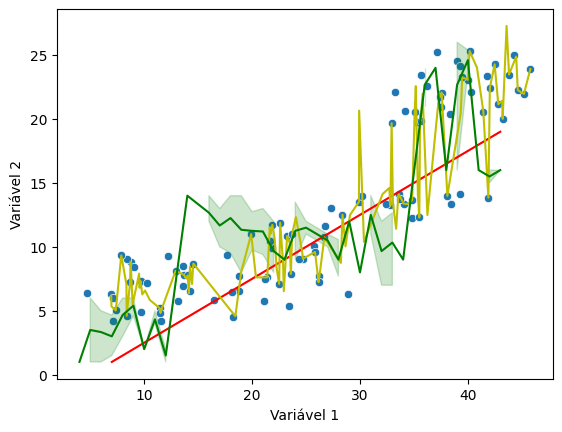

In [21]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    data=df_1
)
sns.lineplot(
    x='x',
    y='y',
    data=df_2,
    c='r',
)
sns.lineplot(
    x='x_noise',
    y='y_noise_new',
    data=df_2,
    c='y',
)
sns.lineplot(
    x='x_noise_mean',
    y='y_noise_mean',
    data=df_2,
    c='g',
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.show()

In [22]:
print(f"RMSE red: {mean_squared_error(df_1['x'], df_2['y'])}")
print(f"RMSE gree: {mean_squared_error(df_1['x_noise_mean'], df_2['y_noise_mean'])}")
print(f"RMSE yellow: {mean_squared_error(df_1['x_noise'], df_2['x_noise'])}")

RMSE red: 443.96
RMSE gree: 342.57
RMSE yellow: 303.4703264135716


---

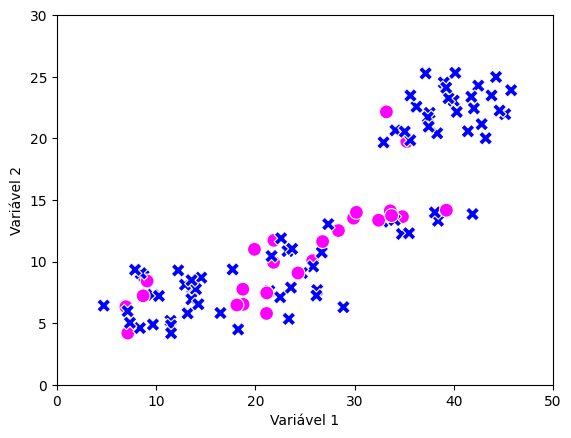

In [23]:
palette = {False:'blue', True:'magenta'}
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='class',
    style='style',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

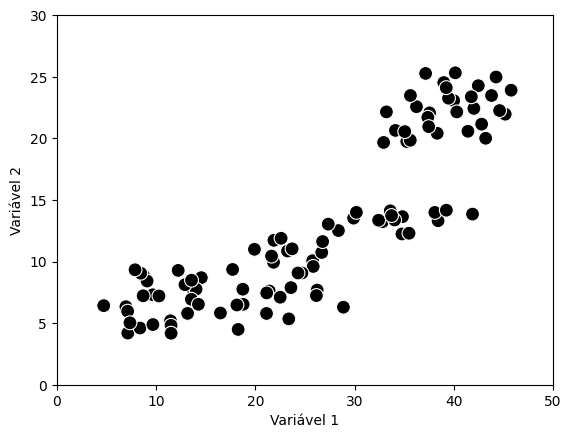

In [24]:
palette = {'o':'black', '+':'black'}
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

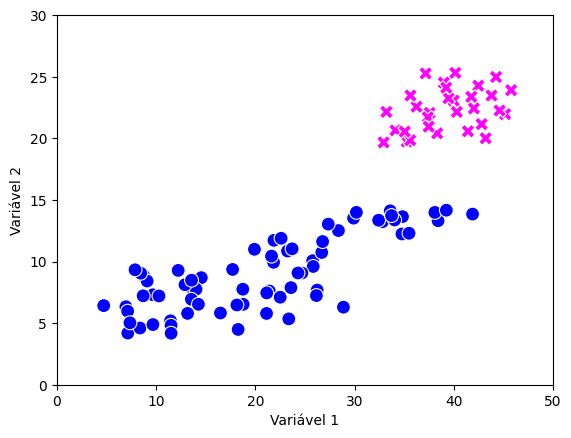

In [25]:
palette = {'o':'blue', '+':'magenta'}
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

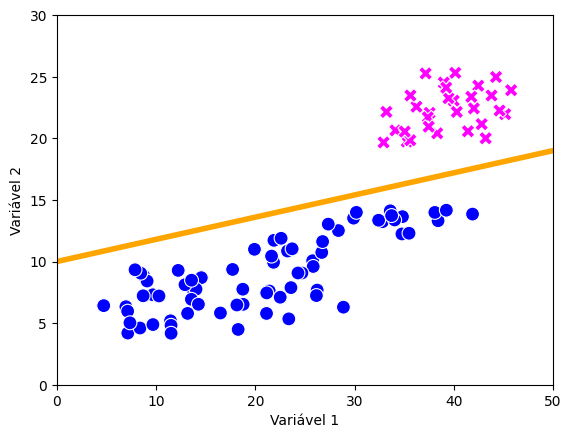

In [ ]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.plot(
    [0, 50], # x
    [10, 19], # y
    c='orange',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

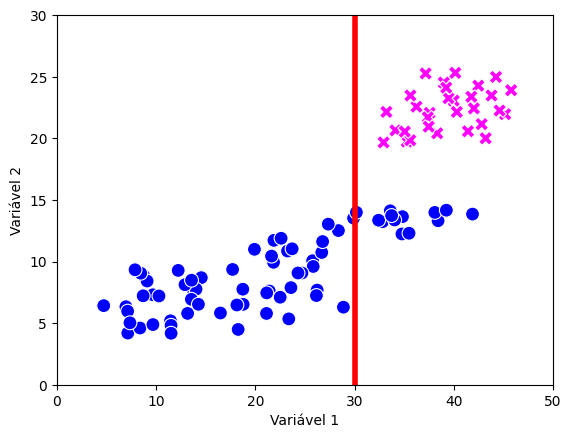

In [27]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.plot(
    [30, 30], # x
    [0, 30], # y
    c='r',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

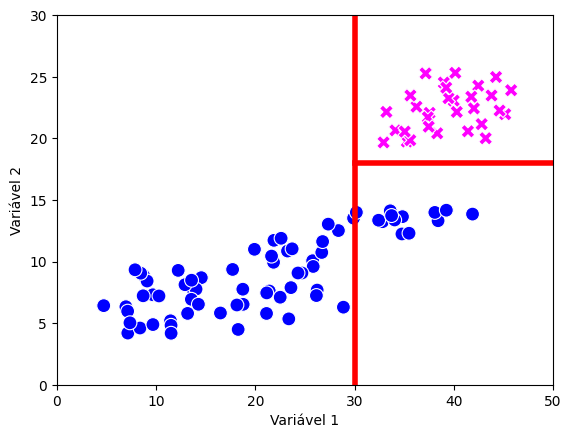

In [28]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.plot(
    [30, 30], # x
    [0, 30], # y
    c='r',
    linewidth=4
)
plt.plot(
    [30, 50], # x
    [18, 18], # y
    c='r',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

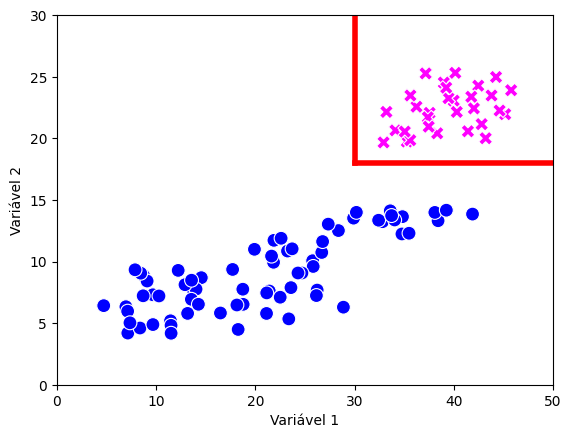

In [29]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.plot(
    [30, 30], # x
    [18, 30], # y
    c='r',
    linewidth=4
)
plt.plot(
    [30, 50], # x
    [18, 18], # y
    c='r',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

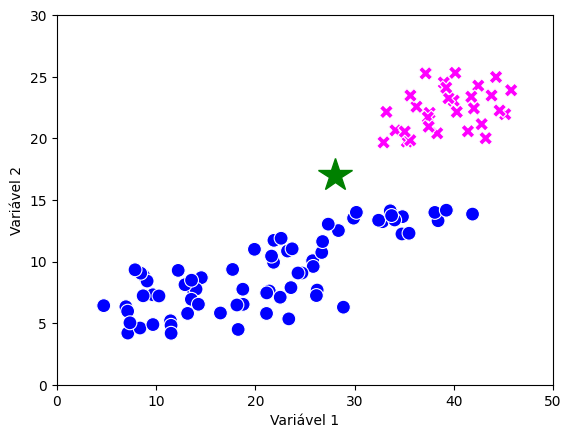

In [30]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.plot(
    28, 17, '*g', markersize=25
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

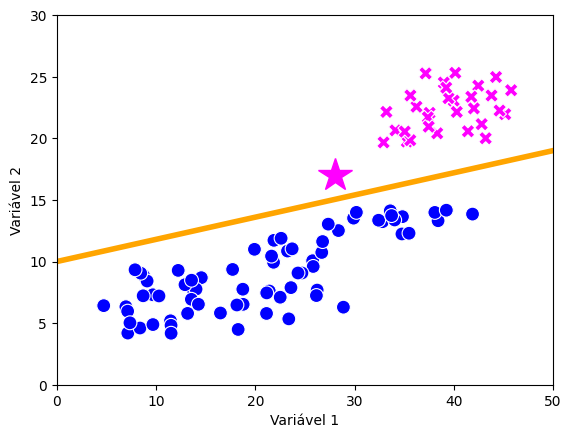

In [31]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.plot(
    28, 17, '*', c=palette['+'], markersize=25
)
plt.plot(
    [0, 50], # x
    [10, 19], # y
    c='orange',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

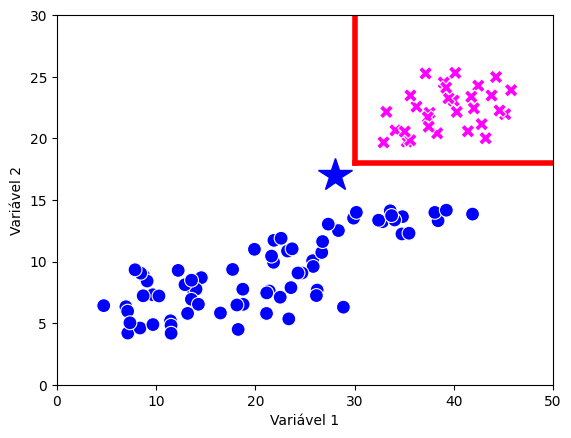

In [32]:
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    style='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=df_1
)
plt.plot(
    28, 17, '*', c=palette['o'], markersize=25
)
plt.plot(
    [30, 30], # x
    [18, 30], # y
    c='r',
    linewidth=4
)
plt.plot(
    [30, 50], # x
    [18, 18], # y
    c='r',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

---

In [33]:
n = 50
x = np.random.randint(5, 45, n)
y = np.random.randint(5, 30, n)
df_nova = pd.DataFrame({'x':x,'y':y})
df_nova.head()

,x,y
0,11,24
1,34,24
2,39,25
3,24,15
4,26,21


In [34]:
palette = {'x':'blue', 'y':'magenta'}
df_nova['class'] = palette['x']
df_nova.loc[df_nova[df_nova['y'] >= 15].index, 'class'] = palette['y']
df_nova.head()

,x,y,class
0,11,24,magenta
1,34,24,magenta
2,39,25,magenta
3,24,15,magenta
4,26,21,magenta


In [35]:
# dump(df_nova, 'df_nova')
df_nova = load('./data/df_nova')

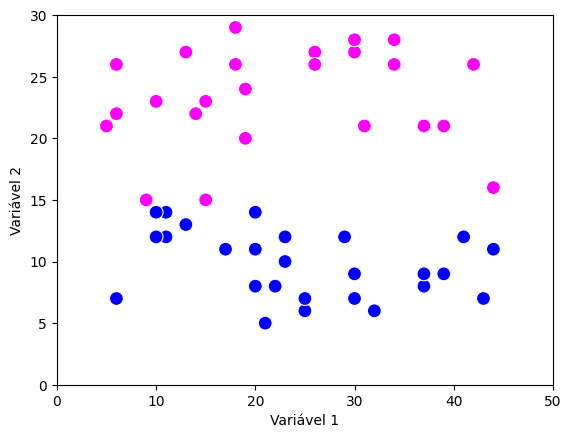

In [36]:
palette = {'magenta': 'blue', 'blue': 'magenta'}
sns.scatterplot(
    x='x',
    y='y',
    hue='class',
    # style='class',
    palette=palette,
    legend=False,
    s=100,
    data=df_nova
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

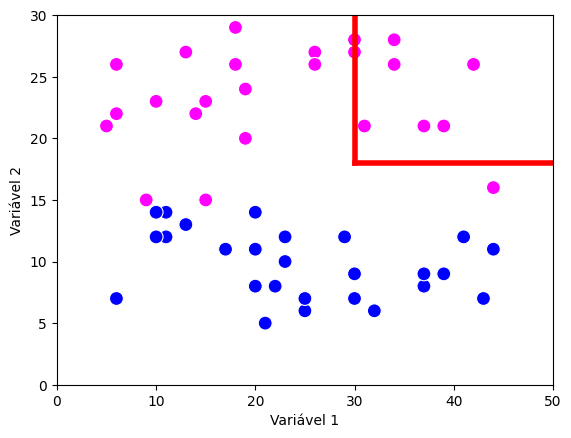

In [37]:
sns.scatterplot(
    x='x',
    y='y',
    hue='class',
    # style='class',
    palette=palette,
    legend=False,
    s=100,
    data=df_nova
)
plt.plot(
    [30, 30], # x
    [18, 30], # y
    c='r',
    linewidth=4
)
plt.plot(
    [30, 50], # x
    [18, 18], # y
    c='r',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

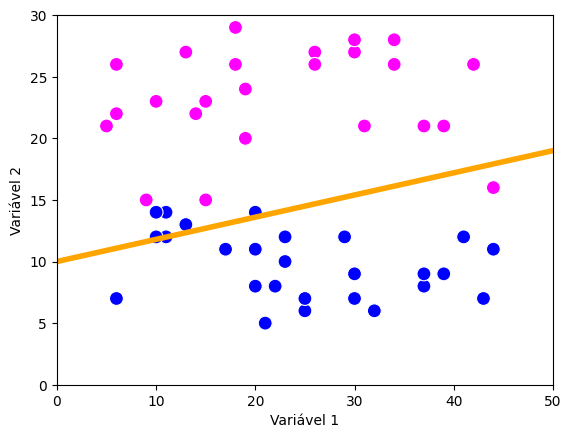

In [38]:
sns.scatterplot(
    x='x',
    y='y',
    hue='class',
    # style='class',
    palette=palette,
    legend=False,
    s=100,
    data=df_nova
)
plt.plot(
    [0, 50], # x
    [10, 19], # y
    c='orange',
    linewidth=4
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

---

In [39]:
x = np.random.randint(543, 592, n)
x

array([567, 559, 555, 546, 546, 552, 574, 568, 578, 562, 549, 558, 553,
       546, 555, 551, 551, 547, 561, 589, 584, 578, 573, 586, 570, 587,
       552, 545, 584, 568, 553, 555, 566, 553, 582, 549, 583, 570, 577,
       573, 547, 547, 589, 589, 584, 569, 546, 588, 558, 566], dtype=int32)

In [40]:
np.mean(x)

np.float64(564.76)

In [41]:
np.median(x)

np.float64(564.0)

In [42]:
np.std(x)

np.float64(14.56373578447508)

---

In [43]:
from src.functions import Functions

In [44]:
dados = df_1.sample(50).copy()
# dump(dados, "./data/dados")
dados = load("./data/dados")
dados.head()

,x,y,x_noise,y_noise,y_noise_new,x_noise_mean,y_noise_mean,class,style,style_2
157,41,18,39.258567,14.165749,14.165749,37,15,True,+,o
129,35,15,34.046405,13.371884,13.371884,32,10,False,o,o
152,13,4,10.290340,2.203792,7.203792,36,15,False,o,o
140,21,8,21.131655,5.785083,5.785083,24,14,True,+,o
126,29,12,28.378891,12.513669,12.513669,17,10,True,+,o


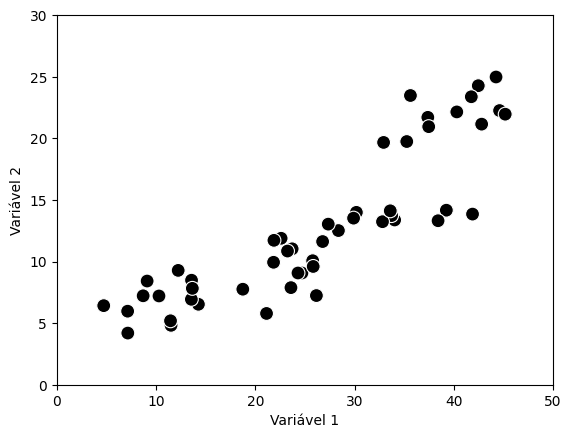

In [45]:
palette = {'o':'black', '+':'black'}
sns.scatterplot(
    x='x_noise',
    y='y_noise_new',
    hue='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=dados
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([0,30])
plt.show()

In [46]:
curva = Functions(
    dados=dados.loc[:, ['x_noise', 'y_noise_new']],
    coluna_x='x_noise',
    coluna_y='y_noise_new',
)
curva.equacao_da_reta_calculo()

np.float64(24.977786651980264)

In [47]:
dados.loc[:, ['x_noise', 'y_noise_new']].max()

x_noise        45.192719
y_noise_new    24.977787
dtype: float64

In [48]:
dados.loc[:, ['x_noise', 'y_noise_new']].min()

x_noise        4.720592
y_noise_new    4.192424
dtype: float64

In [49]:
curva.equacao_da_reta_calculo(new_y=dados.loc[:, ['x_noise', 'y_noise_new']].max()[0])

C:\Users\gfsil\AppData\Local\Temp\ipykernel_12504\3016762172.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curva.equacao_da_reta_calculo(new_y=dados.loc[:, ['x_noise', 'y_noise_new']].max()[0])


np.float64(24.977786651980264)

In [50]:
curva.equacao_da_reta_calculo(new_y=dados.loc[:, ['x_noise', 'y_noise_new']].min()[0])

C:\Users\gfsil\AppData\Local\Temp\ipykernel_12504\3146250567.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curva.equacao_da_reta_calculo(new_y=dados.loc[:, ['x_noise', 'y_noise_new']].min()[0])


np.float64(4.192424205301381)

In [51]:
dados['y_noise_calculo'] = dados['x_noise'].apply(curva.equacao_da_reta_calculo, args=[12,])
normalizador = 37
dados['y_noise_new_cal'] = dados['y_noise_new']*normalizador
# dados['y_noise_calculo'] = dados['x_noise'].apply(curva.equacao_da_reta_calculo)
dados.head()

,x,y,x_noise,y_noise,y_noise_new,x_noise_mean,y_noise_mean,class,style,style_2,y_noise_calculo,y_noise_new_cal
157,41,18,39.258567,14.165749,14.165749,37,15,True,+,o,32.125460,524.132699
129,35,15,34.046405,13.371884,13.371884,32,10,False,o,o,28.913274,494.759692
152,13,4,10.290340,2.203792,7.203792,36,15,False,o,o,14.272727,266.540291
140,21,8,21.131655,5.785083,5.785083,24,14,True,+,o,20.954085,214.048081
126,29,12,28.378891,12.513669,12.513669,17,10,True,+,o,25.420460,463.005763


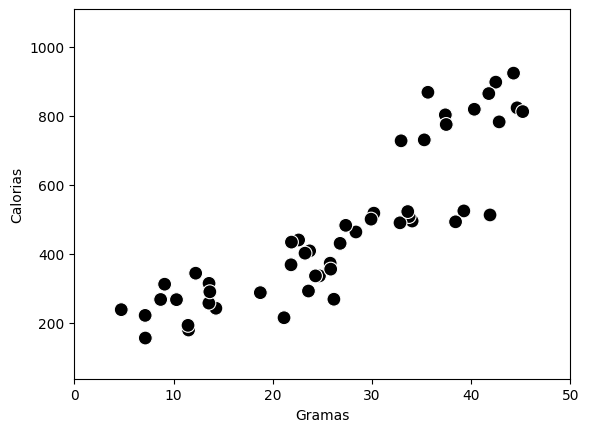

In [52]:
obsr = 'Gramas'
pred = 'Calorias'
palette = {'o':'black', '+':'black'}
sns.scatterplot(
    x='x_noise',
    y='y_noise_new_cal',
    hue='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=dados
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([normalizador,30*normalizador])
plt.show()

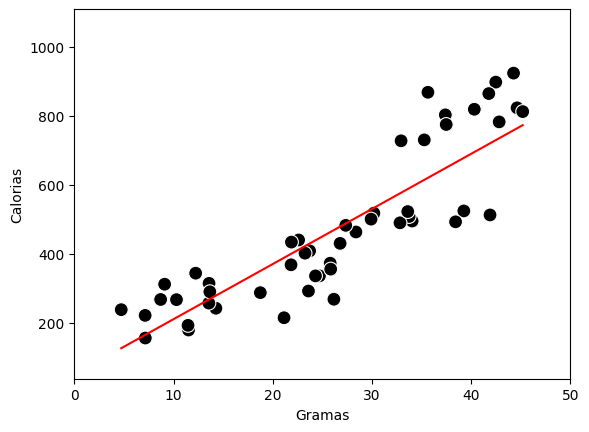

In [53]:
dados_reta = [50, 16,]
dados['y_noise_calculo'] = dados['x_noise'].apply(curva.reta, args=dados_reta)
sns.scatterplot(
    x='x_noise',
    y='y_noise_new_cal',
    hue='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=dados
)
sns.lineplot(
    x='x_noise',
    y='y_noise_calculo',
    data=dados,
    c='r',
)
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([normalizador,30*normalizador])
plt.show()

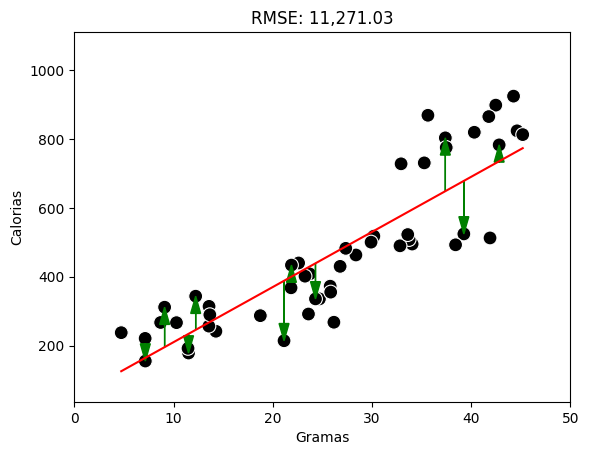

In [54]:
dados['y_noise_calculo'] = dados['x_noise'].apply(curva.reta, args=dados_reta)
sns.scatterplot(
    x='x_noise',
    y='y_noise_new_cal',
    hue='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=dados
)
sns.lineplot(
    x='x_noise',
    y='y_noise_calculo',
    data=dados,
    c='r',
)
for n in range(10):
    index = dados['x_noise'].sample(1).index[0]
    x = dados['x_noise'][index]
    y = dados['y_noise_calculo'][index]
    d = dados['y_noise_new_cal'][index] - y

    plt.arrow(
        x,
        y,
        0,
        d,
        head_width=1,
        head_length=50,
        length_includes_head=True,
        color='g',
    )
rmse = mean_squared_error(dados['y_noise_calculo'],dados['y_noise_new_cal'])
plt.title(f"RMSE: {rmse:,.2f}")
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([normalizador,30*normalizador])
plt.show()

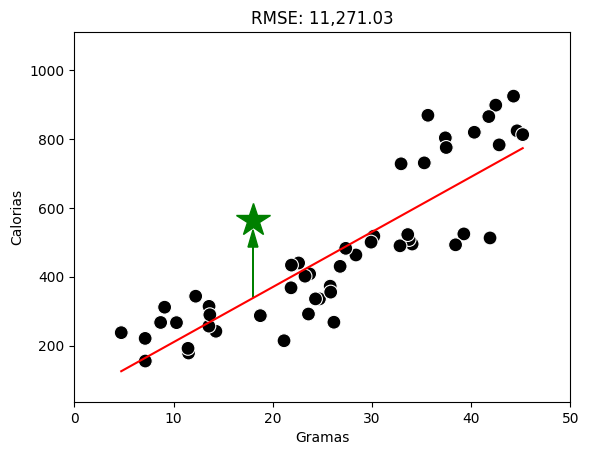

In [55]:
dados['y_noise_calculo'] = dados['x_noise'].apply(curva.reta, args=dados_reta)
sns.scatterplot(
    x='x_noise',
    y='y_noise_new_cal',
    hue='style_2',
    legend=False,
    s=100,
    palette=palette,
    data=dados
)
sns.lineplot(
    x='x_noise',
    y='y_noise_calculo',
    data=dados,
    c='r',
)    
plt.plot(
    18, 566, '*', c='g', markersize=25
)
plt.arrow(
    18,
    340,
    0,
    196,
    head_width=1,
    head_length=50,
    length_includes_head=True,
    color='g',
)
rmse = mean_squared_error(dados['y_noise_calculo'],dados['y_noise_new_cal'])
plt.title(f"RMSE: {rmse:,.2f}")
plt.xlabel(obsr)
plt.ylabel(pred)
plt.xlim([0,50])
plt.ylim([normalizador,30*normalizador])
plt.show()

---

In [56]:
data = [
[2025,16537],
[2024,5434],
[2023,38871],
[2022,39224],
[2021,31559],
[2020,2278],
[2019,16472],
[2018,11267],
[2017,8257],
[2016,6832],
[2015,6803],
[2014,6908],
[2013,6832],
[2012,5574],
[2011,5314],
[2010,4491],
[2009,4642],
[2008,4906],
[2007,4467],
[2006,4065],
[2005,3639],
[2004,2762],
[2003,1802],
[2002,1462],
[2001,1343],
[2000,1248],
[1999,106],
[1998,1025],
[1997,982],
[1996,862],
[1995,905],
[1994,729],
[1993,61],
[1992,438],
[1991,456],
[1990,372],
[1989,295],
[1988,219],
[1987,198],
[1986,165],
[1985,65],
[1984,3],
[1983,23],
[1982,13],
[1981,11],
[1980,12],
[1979,4],
[1978,3],
[1977,5],
[1976,7],
[1975,5],
[1974,7],
[1973,6],
[1972,5],
[1971,3],
[1970,2],
[1969,1],
[1968,5],
[1967,3],
[1966,2],
[1965,4],
[1964,5],
[1963,5],
[1962,6],
[1961,3],
[1960,1],
[1958,1],
[1956,1],
[1954,1],
[1953,1],
[1952,1],
[1951,1],
]
dados_pubmed = pd.DataFrame(data)
dados_pubmed.rename(columns={0: 'Year', 1: 'Works'}, inplace=True)
dados_pubmed.head()

,Year,Works
0,2025,16537
1,2024,5434
2,2023,38871
3,2022,39224
4,2021,31559


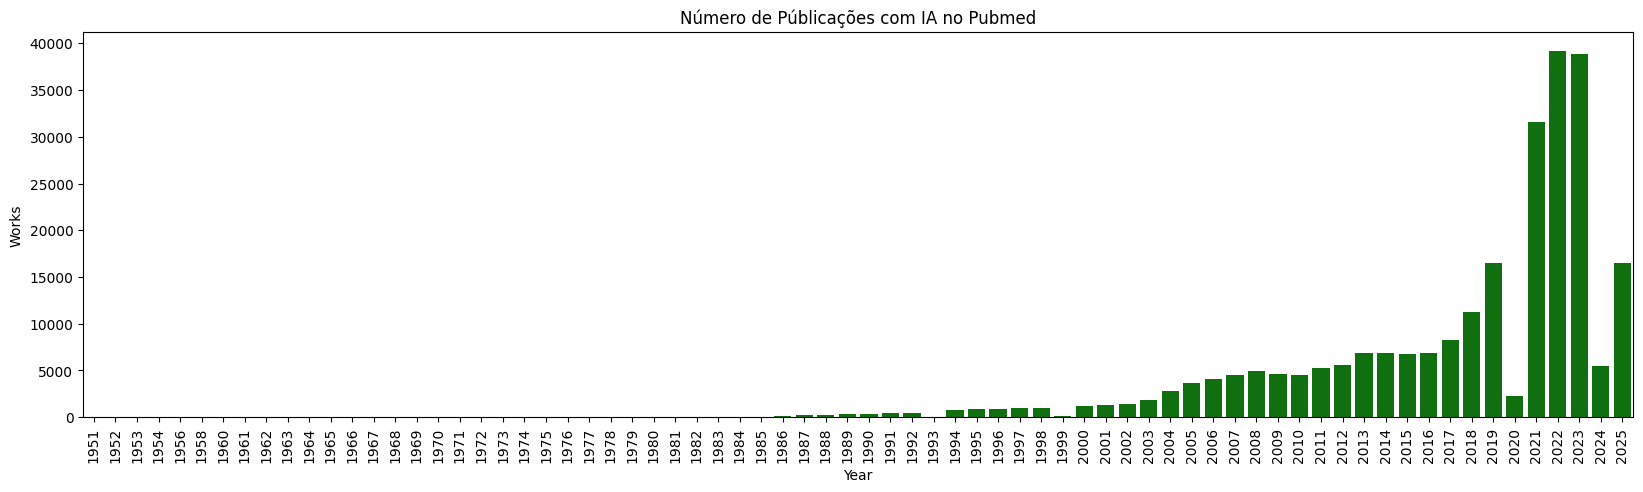

In [57]:
plt.figure(figsize=(20,5))
plt.title('Número de Públicações com IA no Pubmed')
sns.barplot(
    x='Year',
    y='Works',
    legend=False,
    color='green',
    data=dados_pubmed
)
plt.xticks(rotation=90)
plt.show()